In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 

## KNN Classifier

In [3]:
data_train = pd.read_csv("KNN_Training.csv")
data_train.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Label
0,1.329760,2.333649,1.995549,-1.007670,-0.893213,-0.486732,1.862510,-1.260474,-1.838834,-2.275998,-0.314361,0.834180,0
1,0.428410,1.188433,1.700393,3.566153,0.997888,-1.476969,-1.388705,1.973421,-3.099817,2.063377,-0.717461,-0.943609,0
2,2.018099,2.347495,-0.006972,-0.368362,1.023853,2.099101,-3.020703,2.407600,2.141733,1.756333,0.971381,0.970956,0
3,0.347928,2.134760,0.225760,-1.242357,2.834116,1.661654,-0.089612,-1.692146,0.423100,-0.573562,-1.073134,2.134406,0
4,0.308962,2.071116,0.229383,0.074429,0.617944,2.525906,-0.043656,-0.733172,-1.598384,1.537245,-1.808628,0.425732,0


In [4]:
data_test = pd.read_csv("KNN_Test.csv")
data_test.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Label
0,0.032777,0.979273,0.459889,-0.278920,0.123122,-1.350004,-0.255704,1.509399,-1.226672,-4.074170,-1.844843,-3.180446,0
1,1.713719,1.889533,2.492086,-6.502364,1.802023,-4.141655,0.818992,-1.144021,2.212738,-0.149699,-0.921669,-0.542257,0
2,0.066512,2.160987,1.918104,1.184674,2.548974,0.933212,-0.946275,2.571146,3.971795,-0.117977,1.554741,2.856691,0
3,2.041621,2.361032,-1.473821,-2.703834,0.160198,1.348326,-3.676706,4.560130,2.181288,3.089377,-4.726854,-1.688873,0
4,1.422355,2.105559,-1.707259,5.232894,0.682468,-1.291762,-2.923015,-0.328224,-1.089850,-0.920428,3.185554,-0.432850,0


In [5]:
# Separate the training data into the input features (i.e., X) and the class labels (i.e., Y)
Y = data_train['Label']
# X = data_train.drop( labels=['Label'], axis=1, inplace=False )
X = data_train[ ['Feature1', 'Feature2'] ]
# X = data_train.drop( labels=['Label', 'Feature3', 'Feature4'], axis=1, inplace=False )

# Separate the training data into the input features (i.e., X_test) and the class labels (i.e., Y_test)
Y_test = data_test['Label']
# X_test = data_test.drop( labels=['Label'], axis=1, inplace=False )
X_test = data_test[ ['Feature1', 'Feature2'] ]
# X_test = data_test.drop( labels=['Label', 'Feature3', 'Feature4'], axis=1, inplace=False )


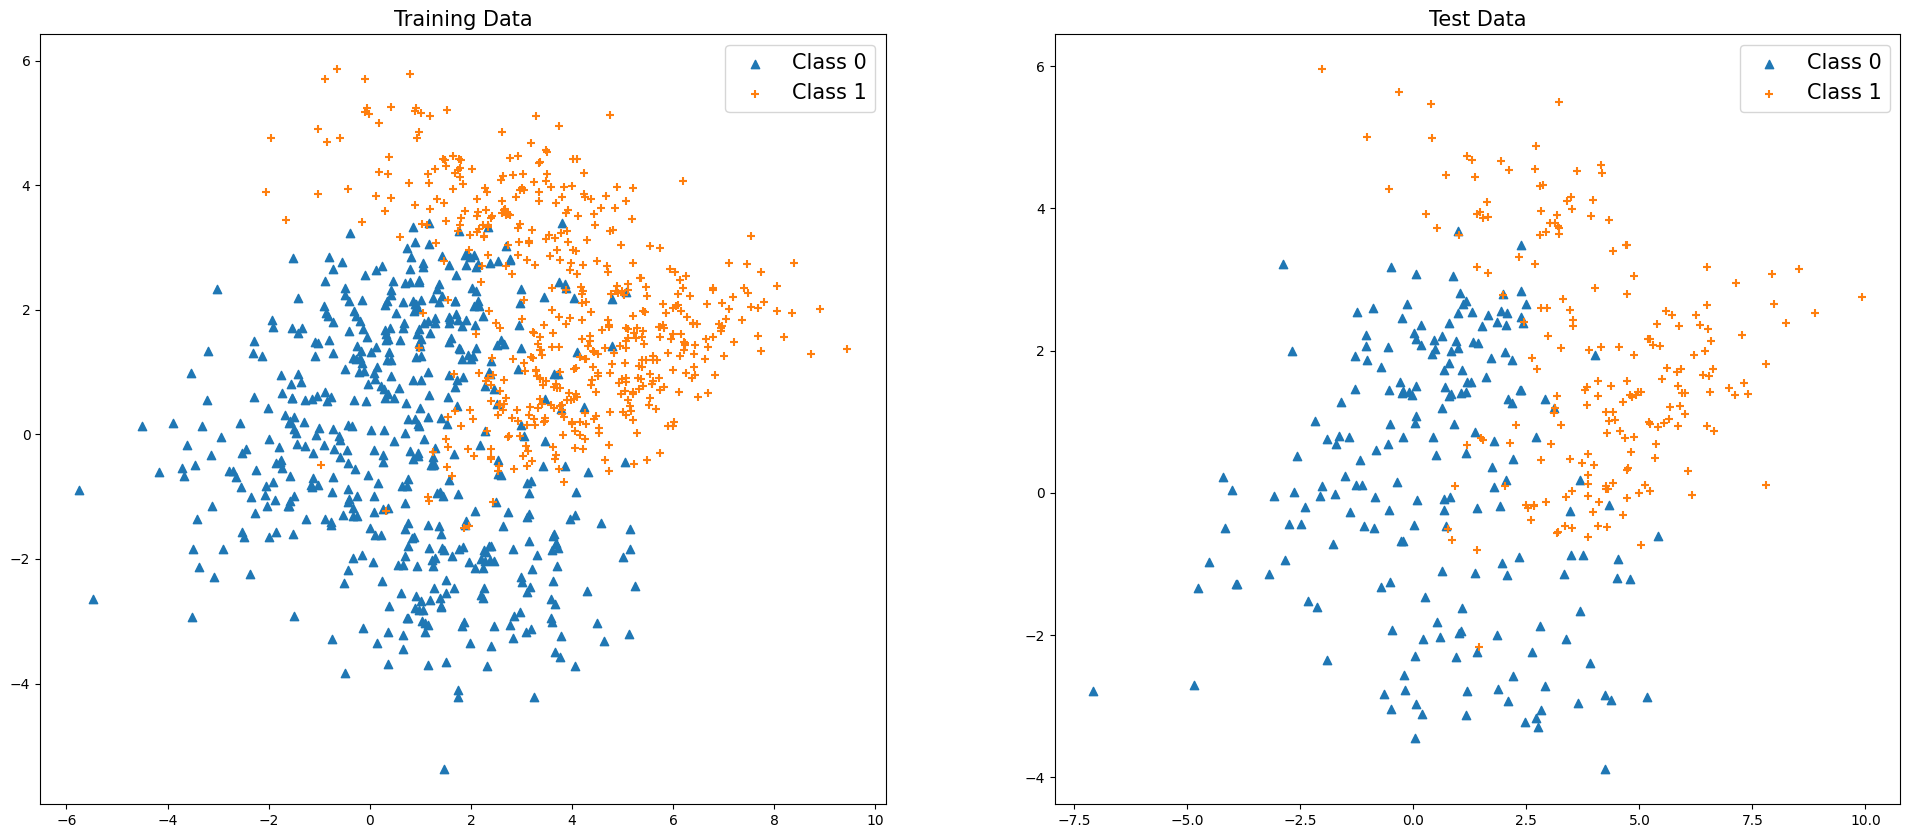

In [7]:
# Visualize the training data
figure, axis = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=False)
X1 = X[Y==0]
X2 = X[Y==1]
axis[0].scatter(X1['Feature1'], X1['Feature2'], marker='^', label='Class 0')
# axis[0].scatter(X1['Feature3'], X1['Feature4'], marker='^', label='Class 0')
axis[0].scatter(X2['Feature1'], X2['Feature2'], marker='+', label='Class 1')
# axis[0].scatter(X2['Feature3'], X2['Feature4'], marker='^', label='Class 0')
axis[0].set_title( 'Training Data', fontsize = 15 )
axis[0].legend(fontsize = 15)

# Visualize the test data
X1 = X_test[Y_test==0]
X2 = X_test[Y_test==1]
axis[1].scatter(X1['Feature1'], X1['Feature2'], marker='^', label='Class 0')
# axis[1].scatter(X1['Feature3'], X1['Feature4'], marker='^', label='Class 0')
axis[1].scatter(X2['Feature1'], X2['Feature2'], marker='+', label='Class 1')
# axis[1].scatter(X2['Feature3'], X2['Feature4'], marker='^', label='Class 0')
axis[1].set_title( 'Test Data', fontsize = 15 )
axis[1].legend(fontsize = 15)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
K = 50
KNN = KNeighborsClassifier(n_neighbors=K, metric = 'euclidean')
# KNN = KNeighborsClassifier(n_neighbors=K, weights='distance', metric = 'euclidean')
KNN.fit(X, Y)
pred = KNN.predict(X_test)
print('K =', K, ', Accuracy =', np.mean(pred == Y_test))

K = 50 , Accuracy = 0.925


In [33]:
def eucl(x,y):
    return np.sqrt( (x[0]-y[0])**2 + (x[1]-y[1])**2 )

In [35]:
from sklearn.neighbors import KNeighborsClassifier
K = 20
KNN = KNeighborsClassifier(n_neighbors=K, metric = eucl)
KNN.fit(X, Y)
pred = KNN.predict(X_test)
print('K =', K, ', Accuracy =', np.mean(pred == Y_test))

K = 20 , Accuracy = 0.93


## K-NN Regression

Text(0.5, 1.0, 'Simulated Data for K-NN Regression')

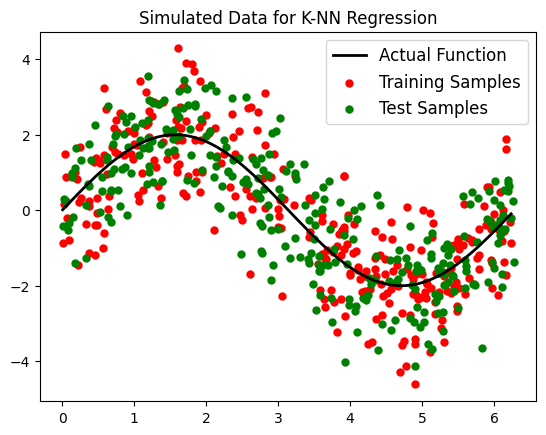

In [10]:
# First, let's simulate a simple dataset

# Use the current time stamp as the random seed for generating the dataset
np.random.seed(seed=int(time.time())) 

n = 300
x_train = np.random.uniform(0, 2*np.pi, n)
x_train = np.sort( x_train )
y_train = 2*np.sin( x_train ) + np.random.normal(size=n)

plt.plot(x_train, 2*np.sin(x_train), color = 'black', label = 'Actual Function', linewidth=2)
plt.scatter(x_train, y_train, color = 'red', marker='.', label = 'Training Samples', linewidth=3)


x_test = np.random.uniform(0, 2*np.pi, n)
x_test = np.sort( x_test )
y_test = 2*np.sin( x_test ) + np.random.normal(size=n)
plt.scatter(x_test, y_test, color = 'green', marker='.', label = 'Test Samples', linewidth=3)
plt.legend(fontsize = 12)
plt.title( 'Simulated Data for K-NN Regression' )

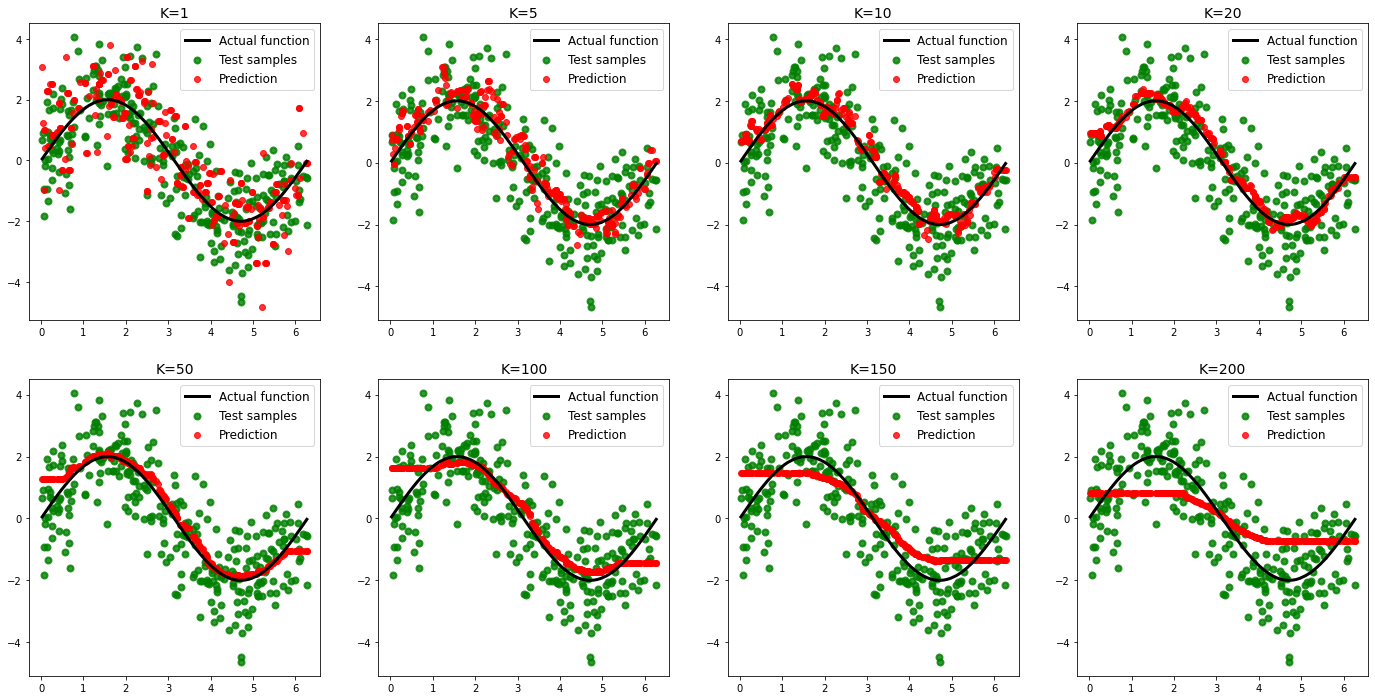

In [35]:
from sklearn.neighbors import KNeighborsRegressor

figure, axis = plt.subplots(2, 4, figsize=(24, 12), constrained_layout=False)
neighbor_numbers = [1, 5, 10, 20, 50, 100, 150, 200]

for r in range(2):
    for c in range(4):
        idx = r * 4 + c
        
        knnReg = KNeighborsRegressor(neighbor_numbers[idx], weights='uniform')
        knnReg.fit(x_train.reshape(-1, 1), y_train)
        test_pred = knnReg.predict(x_test.reshape(-1, 1))
        #visualization
        axis[r, c].plot(x_test, 2*np.sin(x_test), color = 'black', label = 'Actual function', linewidth=3)
        axis[r, c].scatter(x_test, y_test, color = 'green', alpha=0.8, label = 'Test samples', linewidth=2)
        axis[r, c].scatter(x_test, test_pred, color = 'red', alpha=0.8, label = 'Prediction')
        axis[r, c].legend(fontsize = 12)
        axis[r, c].set_title('K=' + str(neighbor_numbers[idx]), fontsize = 14)

### The bias-variance trade-off in KNN
- **Bias** refers to the error that is introduced by approximating a complex relationship between the features and the target variable. A high bias model will oversimplify the relationship and result in underfitting, meaning that the model will perform poorly on both the training data and unseen data. In practice, this is replaced by validation error.

- **Variance** refers to the error that is introduced by the model being too sensitive to the noise in the training data. In practice, this is the training error. A high variance model will overfit the data, meaning that it will perform well on the training data but poorly on unseen data.

\begin{aligned}
\mathrm{E}\left[\left(Y-\widehat{f}\left(x_0\right)\right)^2\right] & =\mathrm{E}\left[\left(Y-f\left(x_0\right)+f\left(x_0\right)-\mathrm{E}\left[\widehat{f}\left(x_0\right)\right]+\mathrm{E}\left[\widehat{f}\left(x_0\right)\right]-\widehat{f}\left(x_0\right)\right)^2\right] \\
& =\mathrm{E}\left[\left(Y-f\left(x_0\right)\right)^2\right]+\mathrm{E}\left[\left(f\left(x_0\right)-\mathrm{E}\left[\hat{f}\left(x_0\right)\right]\right)^2\right]+\mathrm{E}\left[\left(E\left[\widehat{f}\left(x_0\right)\right]-\widehat{f}\left(x_0\right)\right)^2\right]+\text { Cross Terms } \\
& =\underbrace{\mathrm{E}\left[\left(Y-f\left(x_0\right)\right)^2\right]}_{\text {Irreducible Error }}+\underbrace{\left(f\left(x_0\right)-\mathrm{E}\left[\widehat{f}\left(x_0\right)\right]\right)^2}_{\text {Bias }^2}+\underbrace{\mathrm{E}\left[\left(\widehat{f}\left(x_0\right)-\mathrm{E}\left[\widehat{f}\left(x_0\right)\right]\right)^2\right]}_{\text {Variance }}
\end{aligned}

- **Trade off** The tradeoff in k-NN can be controlled by the value of K. A small K will lead to a high variance and low bias model, while a large K will result in a low variance and high bias model. Given a dataset, we should find a K that produces a good tradeoff between bias and variance.